### Simplified model

Libraries and dependencies:

In [1]:
from math import exp
import matplotlib.pyplot as plt
import numpy as np
from ddeint import ddeint

Initial conditions:

In [2]:
V0=1e4
I0 = 0
F0 = 0
Cn0 = 100
E0 = 0
Bn0 = 100
P0 = 0
A0 = 0

Model:

In [3]:
def model(Y, t, pv=210, delta_v=5, km=0.6, beta=5e-7, beta_prim=3e-8, delta_i=2, kn=2.5,
          ke=5e-5, pf=1e-5, delta_f=2, beta_cn=1, hc=1e4, teta_c=6, pc=1.2, delta_e=0.57, beta_bn=0.03, hb=1e4,
          teta_b=4, delta_p=0.5, pb=0.52, pm=8, delta_m=1.0075, T=7e7):

    viral_load, infected_cells, ifn, naive_CD8, effector, naive_B, plasma_cells, antibodies = Y(t)

    VIRAL_LOAD = pv * infected_cells - delta_v * viral_load - km * antibodies - beta * viral_load * T

    INFECTED_CELLS = beta_prim * viral_load * T - delta_i * infected_cells \
                     - kn * infected_cells * ifn - ke * infected_cells * effector

    IFN = pf * infected_cells - delta_f * ifn

    NAIVE_CD8 = - beta_cn * (viral_load / (viral_load + hc)) * naive_CD8

    EFFECTOR = beta_cn * (viral_load * (t - teta_c) / (viral_load * (t - teta_c) + hc)) \
               * naive_CD8 * (t - teta_c) * exp(pc * teta_c) - delta_e * effector

    NAIVE_B = - beta_bn * (viral_load / (viral_load + hb)) * naive_B

    PLASMA_CELLS = beta_bn * (viral_load * (t - teta_b) / (viral_load * (t - teta_b) + hb)) * naive_B * (
            t - teta_b) * exp(
        pb * teta_b) - delta_p * plasma_cells

    ANTIBODIES = pm * plasma_cells - delta_m * antibodies

    return np.array([VIRAL_LOAD, INFECTED_CELLS, IFN, NAIVE_CD8, EFFECTOR, NAIVE_B, PLASMA_CELLS, ANTIBODIES])

Run the model using the initial conditions:

In [4]:
def run_model(y0=np.array([V0, I0, F0, Cn0, E0, Bn0, P0, A0]), t0=0, interval=6, graph_step=10000):
    tt = np.linspace(t0, interval, graph_step)

    y = ddeint(model, lambda t: y0, tt)
    return {"y0": y0, "tt": tt, "y": y}

Plot a calculated model:

In [5]:
def plot_model(y, y0=np.array([V0, 0, 0, 100, 0, 100, 0, 0]), tt=np.linspace(0, 6, 10000)):
    legend = ['V', 'I', 'F', 'Cn', 'E', 'Bn', 'P', 'Am']
    for u in range(len(y0)):
        plt.plot(tt, y[:, u], label=legend[u])
        plt.legend()
        plt.show()

Execution:

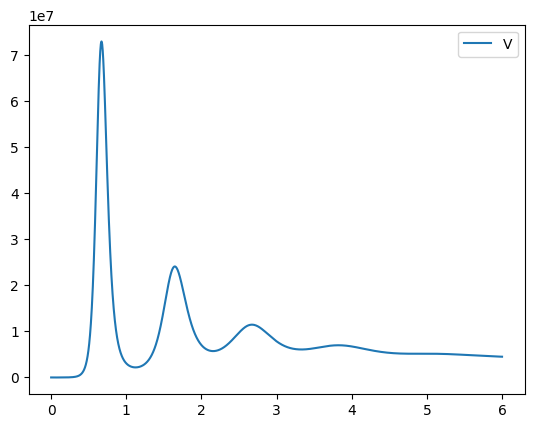

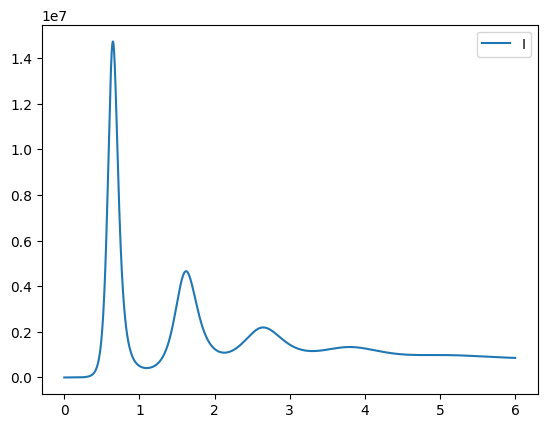

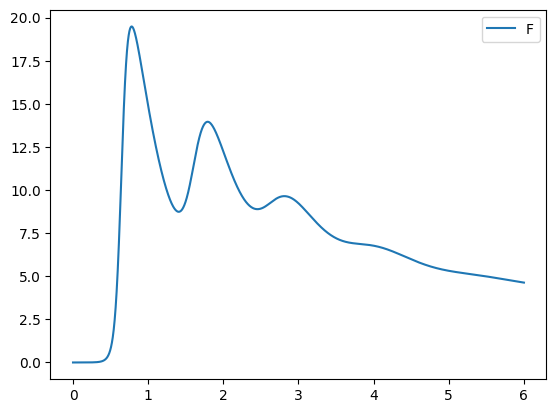

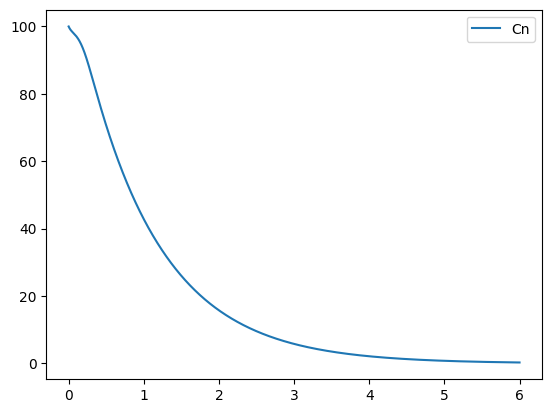

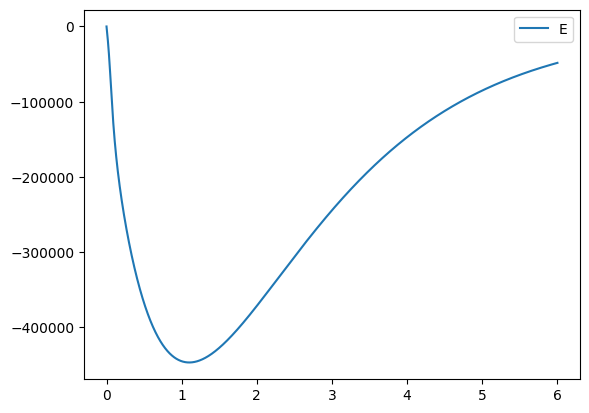

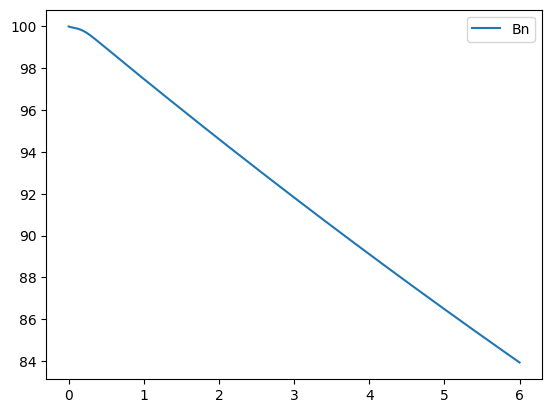

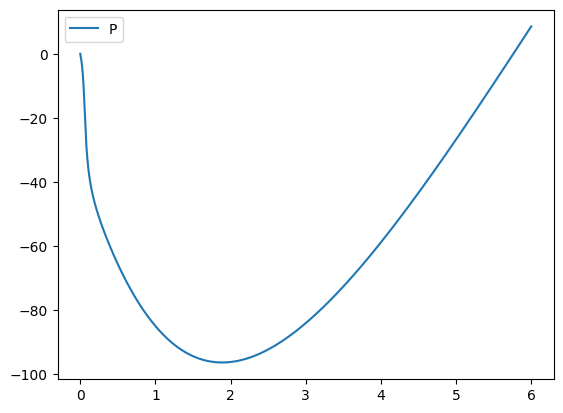

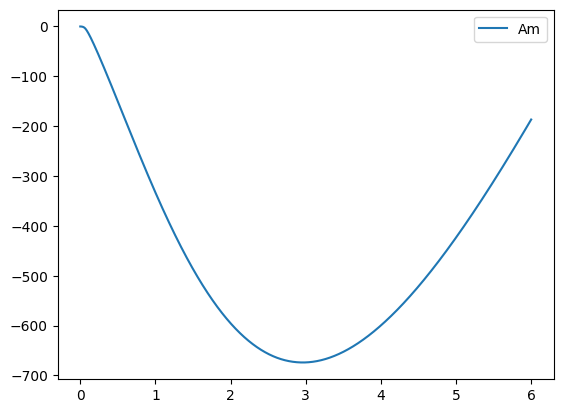

In [6]:
my_model = run_model()
plot_model(my_model["y"])